<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/13_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Word2Vec:**
1. Skip-gram
2. CBOW

SKIPGRAM have word embedding layer(weights) between input and hidden layer 

CBOW have word embedding layer between hidden and output layer 

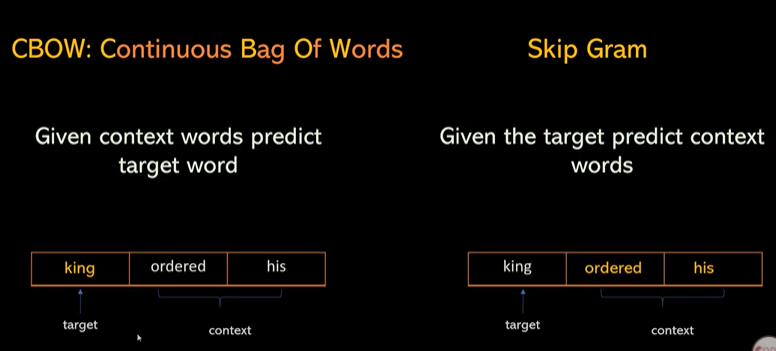

## SKIPGRAM

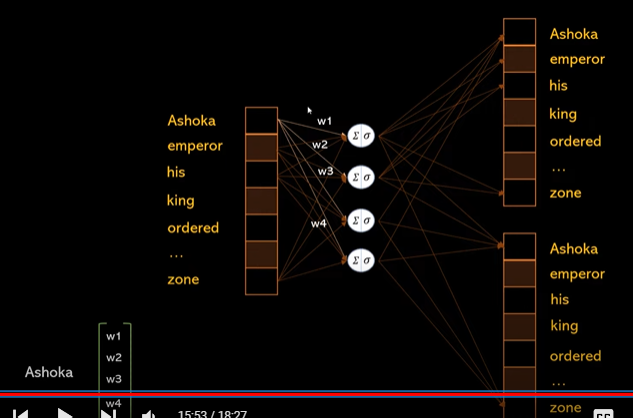

## CBOW

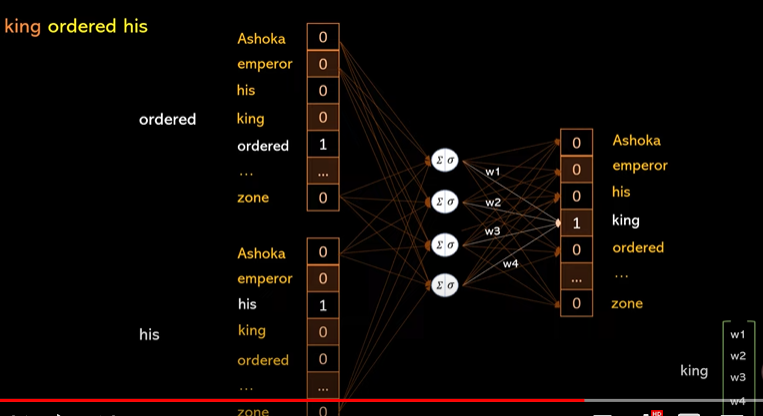

## BERT

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 4.2 MB/s 


In [2]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"


In [3]:
bert_preprocess_model= hub.KerasLayer(preprocess_url)

In [4]:
text_test= ['nice movie indeed', 'i love python progamming']
text_preprocessed= bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_mask', 'input_type_ids'])

In [5]:
text_preprocessed['input_mask']   # 2 sentence= 128 max len of words in sentence
                                  # CLS token1 token2 token3 SEP (1 for each, rest 0)

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [6]:
text_preprocessed['input_word_ids']  #101=CLS, 102=SEP 

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [7]:
bert_model= hub.KerasLayer(encoder_url)

In [8]:
bert_results= bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['encoder_outputs', 'sequence_output', 'pooled_output', 'default'])

In [9]:
bert_results['pooled_output']  #embedding for entire sentence

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.79177463, -0.21411951,  0.49769327, ...,  0.24465072,
        -0.47334516,  0.81758744],
       [-0.8791926 , -0.44781652, -0.66701293, ..., -0.42342198,
        -0.6133869 ,  0.9010234 ]], dtype=float32)>

In [10]:
bert_results['sequence_output']  #individual word embedding vector  --> 2 sentences, max words 128, into 768 embediing vector size
                                 #CLS nice movie indeed SEP 0 0 0 0 0 0 ....<--128
                                 #for each word there is 768 size vector 

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292038,  0.08567842,  0.14476822, ..., -0.09677143,
          0.08722145,  0.07711081],
        [ 0.17839344, -0.19006258,  0.5034949 , ..., -0.0586981 ,
          0.32717144, -0.15578583],
        [ 0.18701449, -0.43388814, -0.48875296, ..., -0.15502766,
          0.00145172, -0.2447103 ],
        ...,
        [ 0.12083013,  0.12884311,  0.4645362 , ...,  0.07375546,
          0.17441897,  0.16522236],
        [ 0.07967884, -0.01190644,  0.5022541 , ...,  0.13777748,
          0.210022  ,  0.00624548],
        [-0.07212698, -0.28303394,  0.5903344 , ...,  0.4755187 ,
          0.1666846 , -0.08920381]],

       [[-0.1419002 ,  0.28752914,  0.01725206, ..., -0.30559427,
          0.12022649,  0.5792091 ],
        [ 0.42125273,  0.4408317 , -0.20137352, ..., -0.13936576,
          0.27632982,  0.09274212],
        [ 1.0687195 ,  0.99707013,  0.6127202 , ...,  0.24950394,
          0.10833613,  0.22366437],
        ...,

In [11]:
len(bert_results['encoder_outputs'])  #12: small bert base have 12 encoders and each layer 768 size embedding vector
                                      # embedidng results for each encoder layer

bert_results['encoder_outputs'][-1]  == bert_results['sequence_output']  
#LAST LAYER is same as the sequence output

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

# CLASSIFICATION Using BERT

In [12]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.groupby('Category').describe()   
#imbalanced data

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [14]:
#Using the downsampling technique to balance out

df_spam= df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [15]:
df_ham= df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [16]:
df_ham_downsampled= df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [17]:
df_balanced= pd.concat([df_ham_downsampled,df_spam])
df_balanced.shape

(1494, 2)

In [18]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [19]:
df_balanced['spam']= df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
766,spam,UR awarded a City Break and could WIN a £200 S...,1
2422,ham,Err... Cud do. I'm going to at 8pm. I haven't...,0
4134,spam,FreeMsg Today's the day if you are ready! I'm ...,1
1380,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...,1
4066,ham,Dont kick coco when he's down,0


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df_balanced['Message'], df_balanced['spam'], stratify=df_balanced['spam'] )

In [21]:
x_train.head(5)

971     Yar lor he wan 2 go c horse racing today mah, ...
5185          I just cooked a rather nice salmon a la you
3670    Yeah imma come over cause jay wants to do some...
2115    Sunshine Hols. To claim ur med holiday send a ...
1888    Urgent! Please call 09061743811 from landline....
Name: Message, dtype: object

In [22]:
def get_sentence_embedding(sentences):
  preprocessed_text= bert_preprocess_model(sentences)
  return bert_model(preprocessed_text)['pooled_output']

get_sentence_embedding(['this is sentence 1', 'followed up another text'])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.80671287, -0.10140559,  0.7551331 , ...,  0.30465567,
        -0.45456767,  0.8252337 ],
       [-0.6998073 , -0.20049295,  0.33747008, ...,  0.3698306 ,
        -0.5195501 ,  0.81564105]], dtype=float32)>

In [23]:
e= get_sentence_embedding(['banana', 'apple','jeff bezos', 'elon_musk'])

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]]), cosine_similarity([e[0]], [e[2]]), cosine_similarity([e[2]], [e[3]])

(array([[0.96597767]], dtype=float32),
 array([[0.8470383]], dtype=float32),
 array([[0.97144467]], dtype=float32))

In [24]:
# Functional model building approach is used here instead of Sequential

#BERT layers
text_input= tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text= bert_preprocess_model(text_input)
outputs= bert_model(preprocessed_text)

#Neural Network Layers
layer= tf.keras.layers.Dropout(0.1, name='drop')(outputs['pooled_output'])
out= tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

#final model
model= tf.keras.Model(inputs=[text_input], outputs=[out] )


In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [26]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'), tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [27]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 32s 610ms/step - loss: 0.6024 - accuracy: 0.6911 - precision: 0.6826 - recall: 0.7143
Epoch 2/10
35/35 [==============================] - 21s 612ms/step - loss: 0.5005 - accuracy: 0.8223 - precision: 0.8161 - recall: 0.8321
Epoch 3/10
35/35 [==============================] - 21s 614ms/step - loss: 0.4397 - accuracy: 0.8446 - precision: 0.8351 - recall: 0.8589
Epoch 4/10
35/35 [==============================] - 21s 612ms/step - loss: 0.3933 - accuracy: 0.8786 - precision: 0.8630 - recall: 0.9000
Epoch 5/10
35/35 [==============================] - 22s 615ms/step - loss: 0.3622 - accuracy: 0.8893 - precision: 0.8720 - recall: 0.9125
Epoch 6/10
35/35 [==============================] - 22s 615ms/step - loss: 0.3532 - accuracy: 0.8723 - precision: 0.8651 - recall: 0.8821
Epoch 7/10
35/35 [==============================] - 22s 615ms/step - loss: 0.3294 - accuracy: 0.8973 - precision: 0.8843 - recall: 0.9143
Epoch 8/10
35/35 [================

In [28]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 8s 600ms/step - loss: 0.3019 - accuracy: 0.8850 - precision: 0.8364 - recall: 0.9572


[0.3018716275691986, 0.885026752948761, 0.836448609828949, 0.9572192430496216]

In [30]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [31]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1 , 0)
y_predicted

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[152,  35],
       [  8, 179]])

Text(33.0, 0.5, 'Truth')

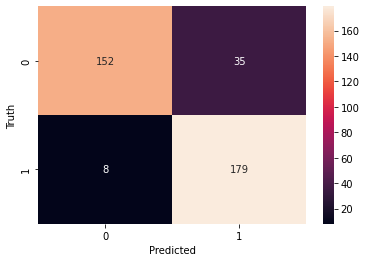

In [33]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       187
           1       0.84      0.96      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.88       374
weighted avg       0.89      0.89      0.88       374



In [36]:
reviews = ['Spiderman was a good movie', 'Dear Sir, Hope you are doing well. May I know the updates on the task given yesterday? Thanks and Regards GoodBoy']
model.predict(reviews)

array([[0.04055601],
       [0.51509833]], dtype=float32)